# Feature Engineering for Cafe Sales (College Mini Project)

**Author:** Your Name  
**Course:** (e.g., Data Science / Machine Learning)  
**Semester:** (e.g., Semester X)  

## Project Overview
This notebook demonstrates a feature engineering workflow applied to a cafe sales dataset. The goal is to clean messy input data, handle missing values and outliers, transform and encode features, and prepare a dataset suitable for exploratory analysis and simple predictive modeling.

## Dataset
The dataset used in this project contains transactional records from a cafe (e.g., items sold, quantity, price, total spent, payment method, location, and transaction date). A sample CSV is included in the `datasets/` folder. The notebook includes steps for reading the CSV, cleaning inconsistent values (e.g., 'unknown', 'error'), converting types, and filling or imputing missing data.

## Objectives
- Clean and preprocess the dataset (handle missing/erroneous values, convert types).
- Explore data distributions and relationships (histograms, correlation heatmap).
- Engineer features (one-hot encoding, scaling, polynomial features).
- Detect and handle outliers using statistical methods.
- Build a simple regression model to predict total spent from numeric features and evaluate performance.


In [101]:
import os
import pandas as pd
import numpy as np

# Check if you're running on Kaggle
IS_KAGGLE = os.path.exists("/kaggle/input")

if IS_KAGGLE:
    dataset_path = "/kaggle/input/cafe-sales-dirty-data-for-cleaning-training/dirty_cafe_sales.csv"
else:
    dataset_path = "datasets/dirty_cafe_sales.csv"

# Load the dataset
df = pd.read_csv(dataset_path)

# Replace 'unknown' and 'error' with NaN
display(df.head())

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [102]:
# Replace all case variations of 'unknown' and 'error' with NaN (null) without regex
to_null = lambda x: np.nan if str(x).lower() in ['unknown', 'error'] else x
df = df.applymap(to_null)
display(df.head())

/var/folders/6p/l4q7z30n5sv_r0vgy0ll38fh0000gn/T/ipykernel_95945/3868124749.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(to_null)


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,NaN,NaN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [103]:
display(df.dtypes)

Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object

In [104]:
# Show all columns and their null value counts
display(df.isnull().sum())
display(df.columns)

Transaction ID         0
Item                 969
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')

In [105]:
modes = {col: df[col].mode().iloc[0] for col in df.columns if not df[col].mode().empty}
df.fillna(value=modes, inplace=True)

In [106]:
print("\nMissing values per column:")
display(df.isnull().sum())


Missing values per column:


Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

In [107]:
df.dtypes

Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object

In [108]:
# Numeric columns you expect
num_cols = ["Quantity", "Price Per Unit", "Total Spent"]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")  # string to float/int, invalids become NaN


# Date columns
date_cols = ["Transaction Date"]  # replace with real
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")

# Categorical cleanup
cat_cols = ["Transaction ID", "Item", "Payment Method", "Location"]
for col in cat_cols:
    df[col] = df[col].astype("category")

In [109]:
df.dtypes

Transaction ID            category
Item                      category
Quantity                     int64
Price Per Unit             float64
Total Spent                float64
Payment Method            category
Location                  category
Transaction Date    datetime64[ns]
dtype: object

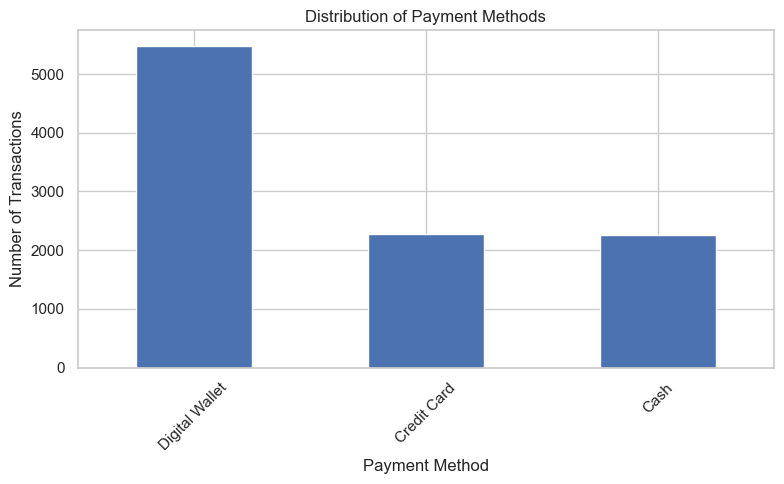

In [110]:
import matplotlib.pyplot as plt

# Count each payment method
payment_counts = df["Payment Method"].value_counts()

# Plot
plt.figure(figsize=(8, 5))
payment_counts.plot(kind="bar")

plt.title("Distribution of Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

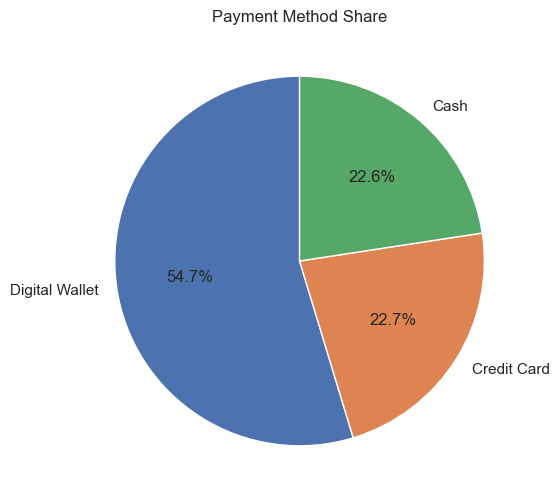

In [111]:
plt.figure(figsize=(6,6))
df['Payment Method'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.title("Payment Method Share")
plt.ylabel("")  # removes y-label
plt.show()


In [112]:
df.dtypes

Transaction ID            category
Item                      category
Quantity                     int64
Price Per Unit             float64
Total Spent                float64
Payment Method            category
Location                  category
Transaction Date    datetime64[ns]
dtype: object

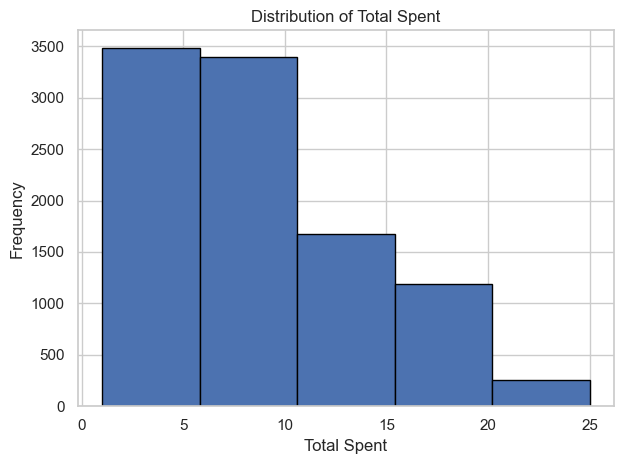

In [113]:
plt.hist(df["Total Spent"], bins=5, edgecolor="black")

plt.title("Distribution of Total Spent")
plt.xlabel("Total Spent")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

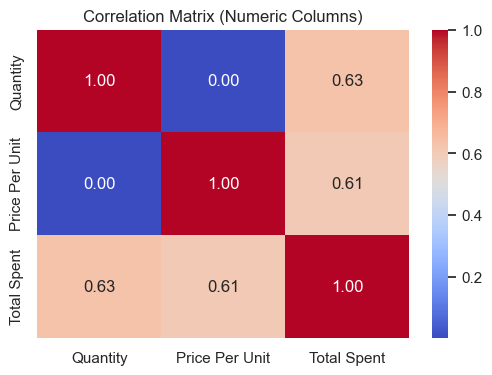

In [114]:
import seaborn as sns

# Compute correlation for numeric columns
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Matrix (Numeric Columns)")
plt.show()

In [115]:
from sklearn.preprocessing import MinMaxScaler

# --- One-Hot Encode categorical variables ---
categorical_cols = ["Payment Method", "Location"]  # add 'Item' if reasonable
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# --- Min-Max Scale numeric variables ---
scaler = MinMaxScaler()
numeric_cols = ["Quantity", "Price Per Unit", "Total Spent"]

df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

print(df_encoded.head())

  Transaction ID    Item  Quantity  Price Per Unit  Total Spent  \
0    TXN_1961373  Coffee      0.25            0.25     0.125000   
1    TXN_4977031    Cake      0.75            0.50     0.458333   
2    TXN_4271903  Cookie      0.75            0.00     0.208333   
3    TXN_7034554   Salad      0.25            1.00     0.375000   
4    TXN_3160411  Coffee      0.25            0.25     0.125000   

  Transaction Date  Payment Method_Credit Card  Payment Method_Digital Wallet  \
0       2023-09-08                        True                          False   
1       2023-05-16                       False                          False   
2       2023-07-19                        True                          False   
3       2023-04-27                       False                           True   
4       2023-06-11                       False                           True   

   Location_Takeaway  
0               True  
1              False  
2              False  
3               Tr

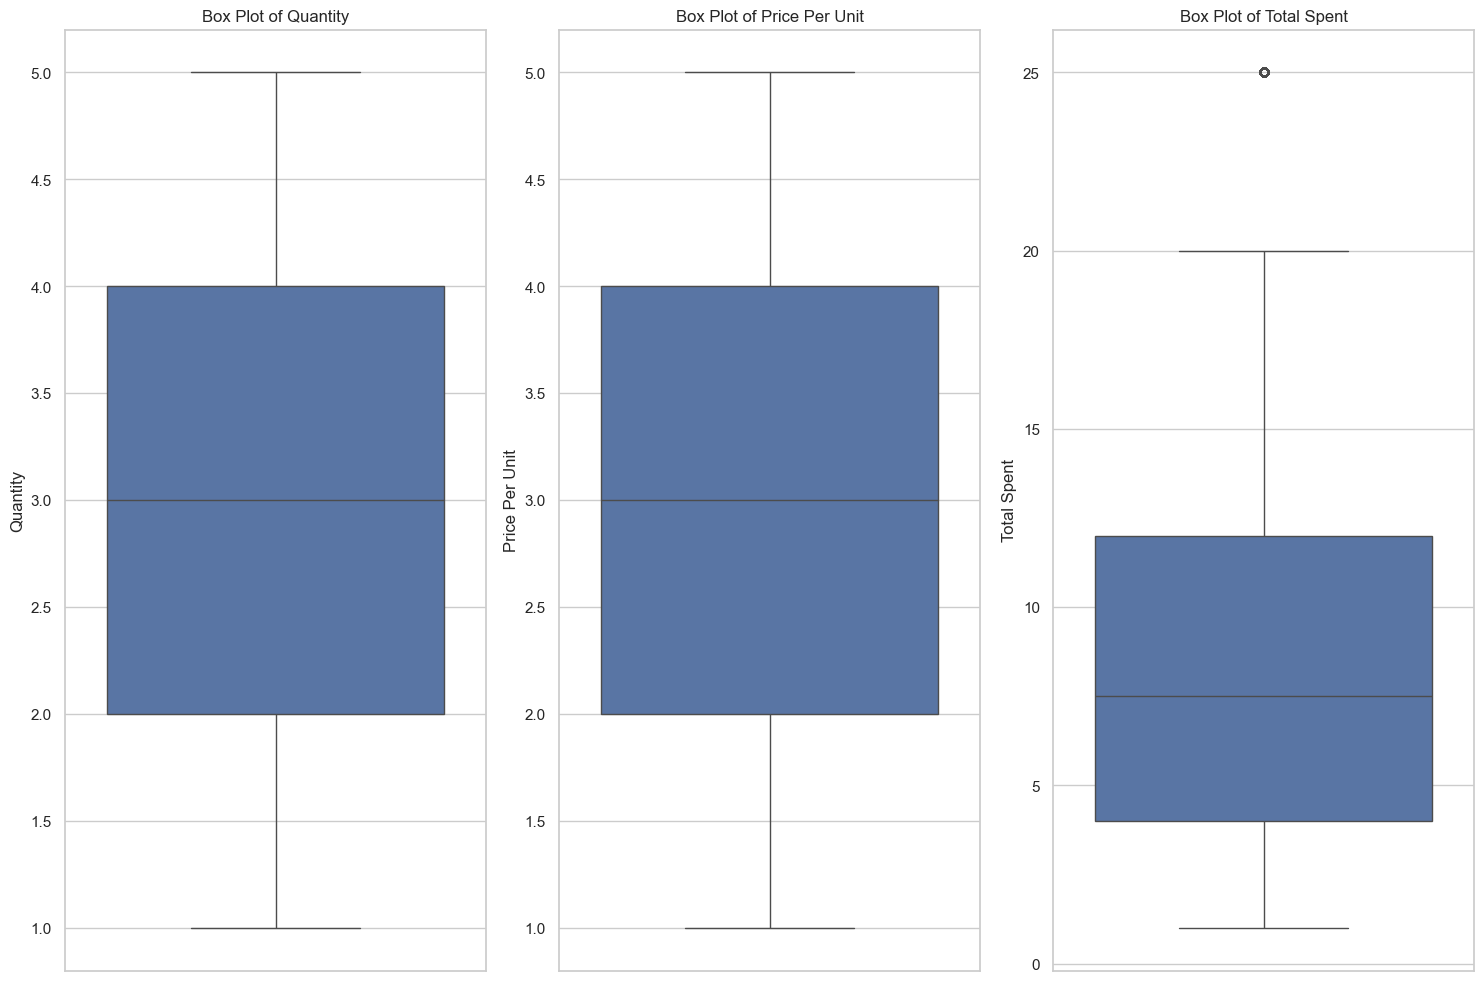


Outlier Detection using IQR method:
Quantity: 0 outliers (0.00% of data)
Price Per Unit: 0 outliers (0.00% of data)
Total Spent: 259 outliers (2.59% of data)
  - Lower bound: -8.00
  - Upper bound: 24.00
  - Min value: 1.00
  - Max value: 25.00


In [ ]:
# --- Check for Outliers using Box Plots ---
plt.figure(figsize=(15, 10))

# Create box plots for numeric columns
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i+1)
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()

# Statistical approach to identify outliers (IQR method)
print("\nOutlier Detection using IQR method:")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(df)) * 100
    
    print(f"{col}: {outlier_count} outliers ({outlier_percent:.2f}% of data)")
    
    if outlier_count > 0:
        print(f"  - Lower bound: {lower_bound:.2f}")
        print(f"  - Upper bound: {upper_bound:.2f}")
        print(f"  - Min value: {df[col].min():.2f}")
        print(f"  - Max value: {df[col].max():.2f}")


--- Outlier Handling Strategies ---

Strategy 1: Capping (Winsorization)

Quantity statistics:
  Original - Min: 1.00, Max: 5.00, Mean: 3.12, Std: 1.45
  Capped   - Min: 1.00, Max: 5.00, Mean: 3.12, Std: 1.45

Price Per Unit statistics:
  Original - Min: 1.00, Max: 5.00, Mean: 2.95, Std: 1.24
  Capped   - Min: 1.00, Max: 5.00, Mean: 2.95, Std: 1.24

Total Spent statistics:
  Original - Min: 1.00, Max: 25.00, Mean: 8.78, Std: 5.89
  Capped   - Min: 1.00, Max: 24.00, Mean: 8.75, Std: 5.82


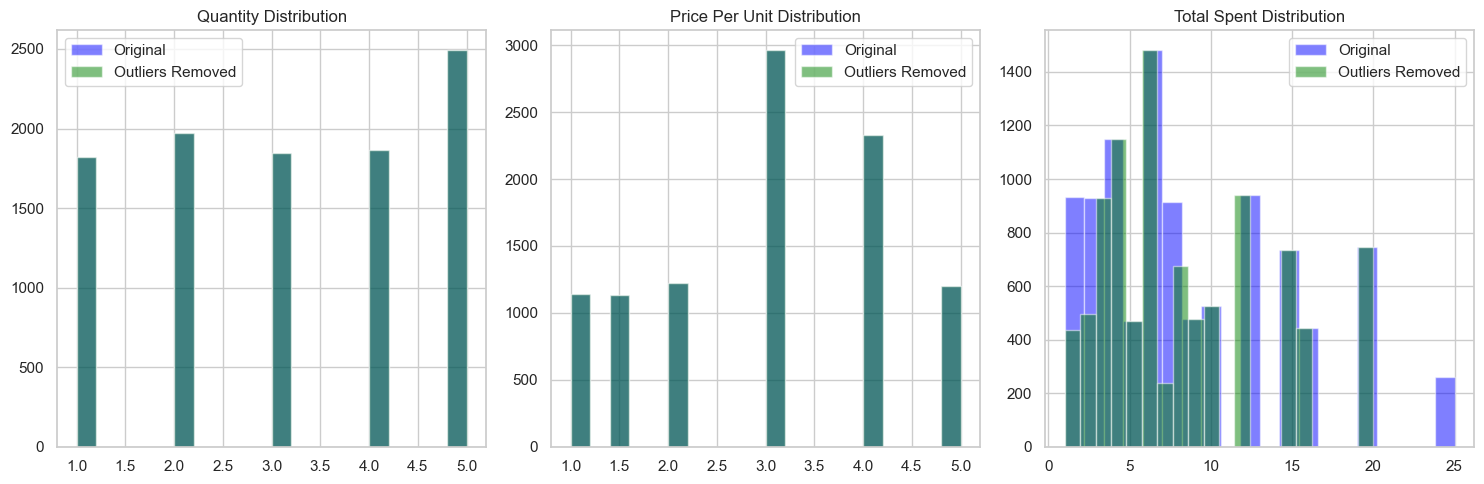

In [117]:
print("\n--- Outlier Handling Strategies ---")

# Create a copy of the original dataframe for demonstration
df_no_outliers = df.copy()

# Strategy 1: Capping (Winsorization)
print("\nStrategy 1: Capping (Winsorization)")
df_capped = df.copy()

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Apply capping
    df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)

# Compare original vs capped
for col in numeric_cols:
    print(f"\n{col} statistics:")
    print(f"  Original - Min: {df[col].min():.2f}, Max: {df[col].max():.2f}, Mean: {df[col].mean():.2f}, Std: {df[col].std():.2f}")
    print(f"  Capped   - Min: {df_capped[col].min():.2f}, Max: {df_capped[col].max():.2f}, Mean: {df_capped[col].mean():.2f}, Std: {df_capped[col].std():.2f}")

# Strategy 2: Visualization of outlier removal impact
plt.figure(figsize=(15, 5))

for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i+1)
    
    # IQR method to identify outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create a version with outliers removed
    df_filtered = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    # Plot histograms
    plt.hist(df[col], bins=20, alpha=0.5, color='blue', label='Original')
    plt.hist(df_filtered[col], bins=20, alpha=0.5, color='green', label='Outliers Removed')
    
    plt.title(f"{col} Distribution")
    plt.legend()

plt.tight_layout()
plt.show()

In [118]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Features and target
X = df[["Quantity", "Price Per Unit"]]
y = df["Total Spent"]

# Pipeline: Polynomial -> Scale -> Regression
model = Pipeline(
    [
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ("scaler", MinMaxScaler()),
        ("regressor", LinearRegression()),
    ]
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit
model.fit(X_train, y_train)

# Evaluate
r2 = model.score(X_test, y_test)
print(f"R² Score: {r2:.3f}")

R² Score: 0.836


In [119]:
# Predict on test set
y_pred = model.predict(X_test)

# Show first 10 predictions vs actual
import pandas as pd

results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(results.head(10))


      Actual  Predicted
6252    15.0  13.568561
4684     3.0   3.017935
1731    20.0  18.135209
4742     9.0   8.887503
4521     6.0   6.101282
6340     4.0   4.206504
576      4.5   4.733169
5202     1.5   6.769522
6363     2.0   2.004725
439      8.0   8.023225
